In [1]:
from lazylib import make, AlexNet, device, takeConfusionMatrix, takeRocCurve, now, register, takeFromDisk
import torch

/home/luizp/projects/pibit/pibit/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
n = now()
epocs = 15
model = make(
    EPOCHS=epocs, 
    BATCH_SIZE=128, 
    LEARNING_RATE=1e-3, 
    csv_path="/home/luizp/projects/pibit/src/data/processed/csv/cicClean.csv", 
    out_path=f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}',
    MODEL=AlexNet(x=128).to(device()), 
    SEED=1701,
    xcol=1
    ) 
torch.save(model.state_dict(), f"/home/luizp/projects/pibit/src/0utput/models/{n}_alexnet_{epocs}.nnModel")

[31-07-2024 03-46-04] Epoch 001 Acc: 0.9790 Loss: 0.06296218: 100%|██████████| 782/782 [00:16<00:00, 47.43it/s]
[31-07-2024 03-46-59] Epoch 001 Val. Acc: 0.9965 Val. Loss: 0.02111308: 100%|██████████| 7032/7032 [00:54<00:00, 128.74it/s]
[31-07-2024 03-47-21] Epoch 002 Acc: 0.9974 Loss: 0.01418429: 100%|██████████| 782/782 [00:16<00:00, 47.55it/s]
[31-07-2024 03-48-16] Epoch 002 Val. Acc: 0.9980 Val. Loss: 0.01012521: 100%|██████████| 7032/7032 [00:55<00:00, 127.66it/s]
[31-07-2024 03-48-40] Epoch 003 Acc: 0.9975 Loss: 0.01399840: 100%|██████████| 782/782 [00:18<00:00, 42.51it/s]
[31-07-2024 03-49-55] Epoch 003 Val. Acc: 0.9984 Val. Loss: 0.00993368: 100%|██████████| 7032/7032 [01:12<00:00, 96.67it/s] 
[31-07-2024 03-50-22] Epoch 004 Acc: 0.9970 Loss: 0.01533544: 100%|██████████| 782/782 [00:18<00:00, 42.55it/s]
[31-07-2024 03-51-37] Epoch 004 Val. Acc: 0.9974 Val. Loss: 0.01264666: 100%|██████████| 7032/7032 [01:13<00:00, 96.17it/s] 
[31-07-2024 03-52-05] Epoch 005 Acc: 0.9968 Loss: 0.

Finished experiment!


In [6]:
train = takeFromDisk(f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}-train--15.txt')
valid = takeFromDisk(f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}-valid--15.txt')

In [7]:
import numpy as np
from sklearn.metrics import auc, roc_curve, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

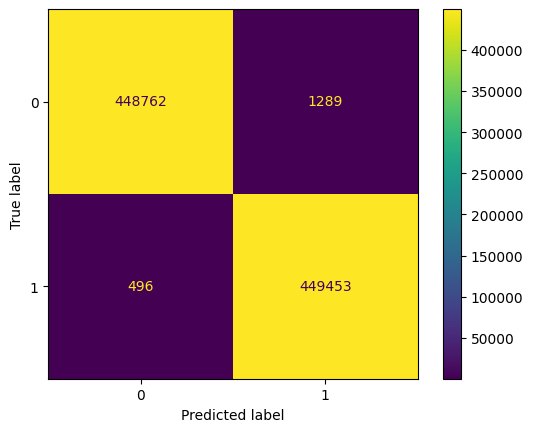

In [8]:
ConfusionMatrixDisplay(np.array(valid[0]['confusion_matrix'])).plot()

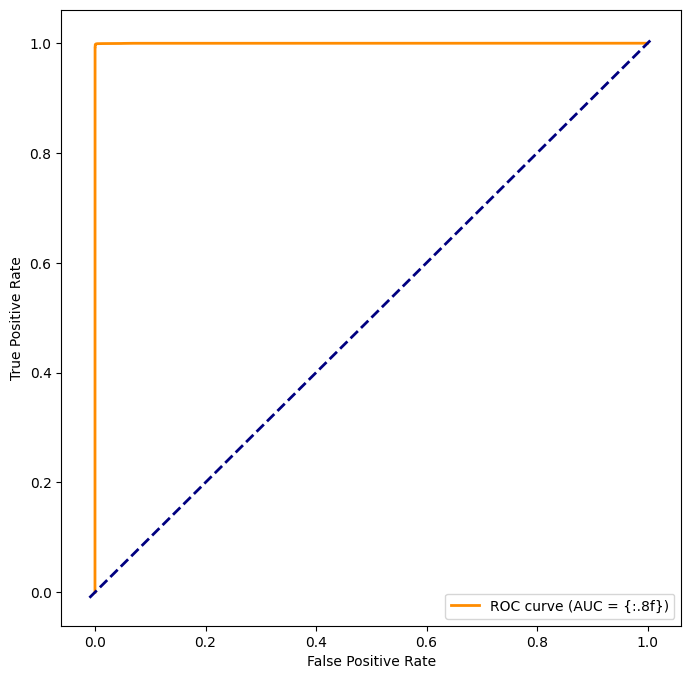

: 

In [9]:
takeRocCurve(valid)